In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [125]:
filename = 'results_evaluation_species_50_55.csv'

df = pd.read_csv('../ResultsEvaluation/SRR/'+filename, sep='\t')
df

,Classifier,tp,fp,fn,ok,no,(tp+fp+fn+ok+no),sens,prec,f1,pearson
0,SRR1804065_1.filtr.fq_MP.V1.res,437506,1522780,3269135,166147,105415,5500983,0.081086,0.223185,0.118955,0.929076
1,SRR1804065_1.filtr.fq_MP.V2.res,437599,1528918,3262589,166384,105493,5500983,0.081105,0.222525,0.118880,0.929100
2,SRR1804065_1.filtr.fq_MPZ.V1.res,456460,2265591,2482228,175575,121129,5500983,0.084846,0.167690,0.112680,0.929243
3,SRR1804065_1.filtr.fq_MPZ.V2.res,460754,2863997,1864582,188101,123549,5500983,0.085683,0.138583,0.105894,0.930039
4,SRR1804065_1.filtr.fq_MT.V1.res,426184,1417476,3417983,160034,79306,5500983,0.078607,0.231162,0.117320,0.919519
5,SRR1804065_1.filtr.fq_MT.V2.res,425689,1425264,3419147,151594,79289,5500983,0.078516,0.229984,0.117066,0.919625
6,SRR1804065_1.filtr.fq_MTZ.V1.res,450491,2273696,2482228,173439,121129,5500983,0.083737,0.165367,0.111177,0.924797
7,SRR1804065_1.filtr.fq_MTZ.V2.res,453924,2880372,1864582,178556,123549,5500983,0.084413,0.136138,0.104210,0.925611
8,strex_centrifuge_SRR1804065.res,435805,1564786,3249654,158039,92699,5500983,0.080581,0.217838,0.117644,0.930257
9,strex_centrifuge_SRR180406_SP.res,436911,1648456,3138630,170414,106572,5500983,0.080993,0.209513,0.116825,0.930482


In [128]:
def ReacllPlot(df):
    
    classificators = ['centrifuge','clark_species','k2','kraken1']
    fig, ax = plt.subplots(figsize=(20,10))
    
    ## centrifuge
    new_df = df[df["Classifier"].str.contains(classificators[0])]

    y = new_df['sens']
    x = np.arange(len(classificators))  # the label locations
    width = 0.50  # the width of the bars
    

    y=[]
    y_sp = []
    y_spz = []
    y_st = []
    y_stz = []
    
    for name in classificators:
        new_df = df[df["Classifier"].str.contains(name)]
    
        label = []
        for i in range (0,5):
            if 'SPZ' in new_df['Classifier'].values[i]:
                label.append('SPZ')
                y_spz.append(new_df['sens'].values[i])
            elif 'SP' in new_df['Classifier'].values[i]:
                label.append('SP')
                y_sp.append(new_df['sens'].values[i])

            elif 'STZ' in new_df['Classifier'].values[i]:
                label.append('STZ')
                y_stz.append(new_df['sens'].values[i])
            elif 'ST' in new_df['Classifier'].values[i]:
                label.append('ST')
                y_st.append(new_df['sens'].values[i])
            else:
                label.append(name)
                y.append(new_df['sens'].values[i])
    
      ##colors
    #C1CF79   verde 
    #C57673   marroncino
    #B375CC   viola
    #7797CD   blue
    #87CE9B   verde acceso
    
    plt.bar(x - 2.25*width/5, y, width/5, label='Initial classification', color='#C1CF79')
    plt.bar(x - 1.25*width/5, y_sp, width/5, label='Single Partial', color='#C57673')
    plt.bar(x - 0.25*width/5, y_spz, width/5, label='Single Partial Zero', color='#B375CC')
    plt.bar(x + 0.75*width/5, y_st, width/5, label='Single Total', color='#7797CD')
    plt.bar(x + 1.75*width/5, y_stz, width/5, label='Single Total Zero', color='#87CE9B')

     # Add some text for labels, title and custom x-axis tick labels, etc.
    plt.ylabel('Recall')
    # plt.title('Scores by group and gender')
    plt.xticks(x)
    ax.set_xticklabels(classificators)
    plt.legend(loc='upper center')
    plt.grid(True)

    plt.savefig('recall-only-species')
    plt.show()
    

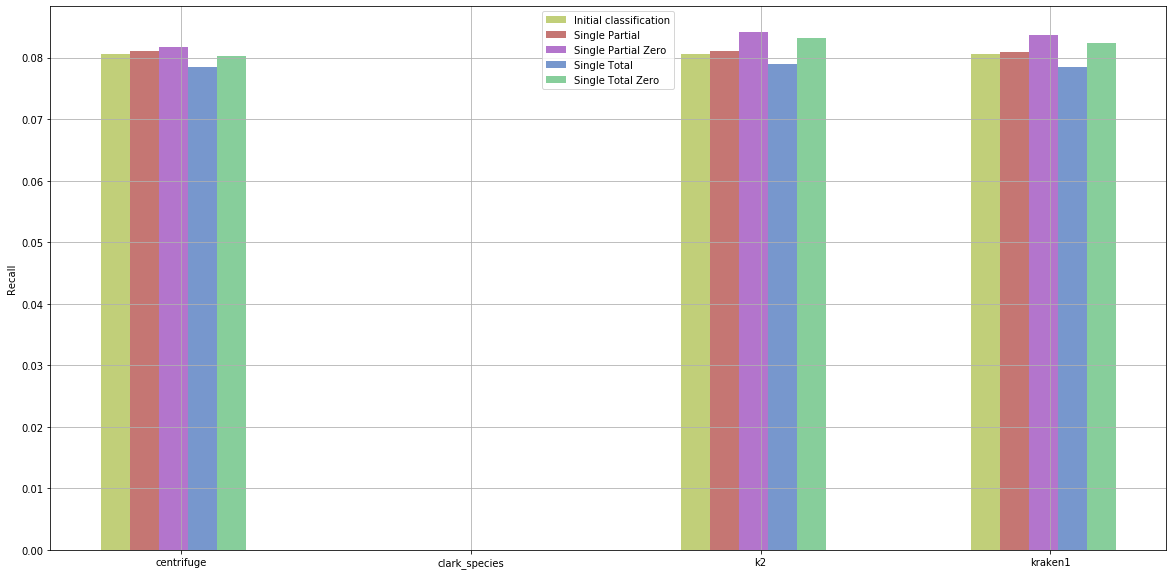

In [129]:
ReacllPlot(df)